# Author : Akash Kothare

Data Science & Business Analytics Intern (Batch - Dec'20)

## Task 5: Exploratory Data Analysis - Sports

In this EDA task, we have to clean the data and visualize the same using different methods in order to derive meaningful insights from the 2 given datasets of the famous Indian Premier League(IPL).

*I've solely used "Plotly" library for visualizations, thus all the graphs are interactive.*

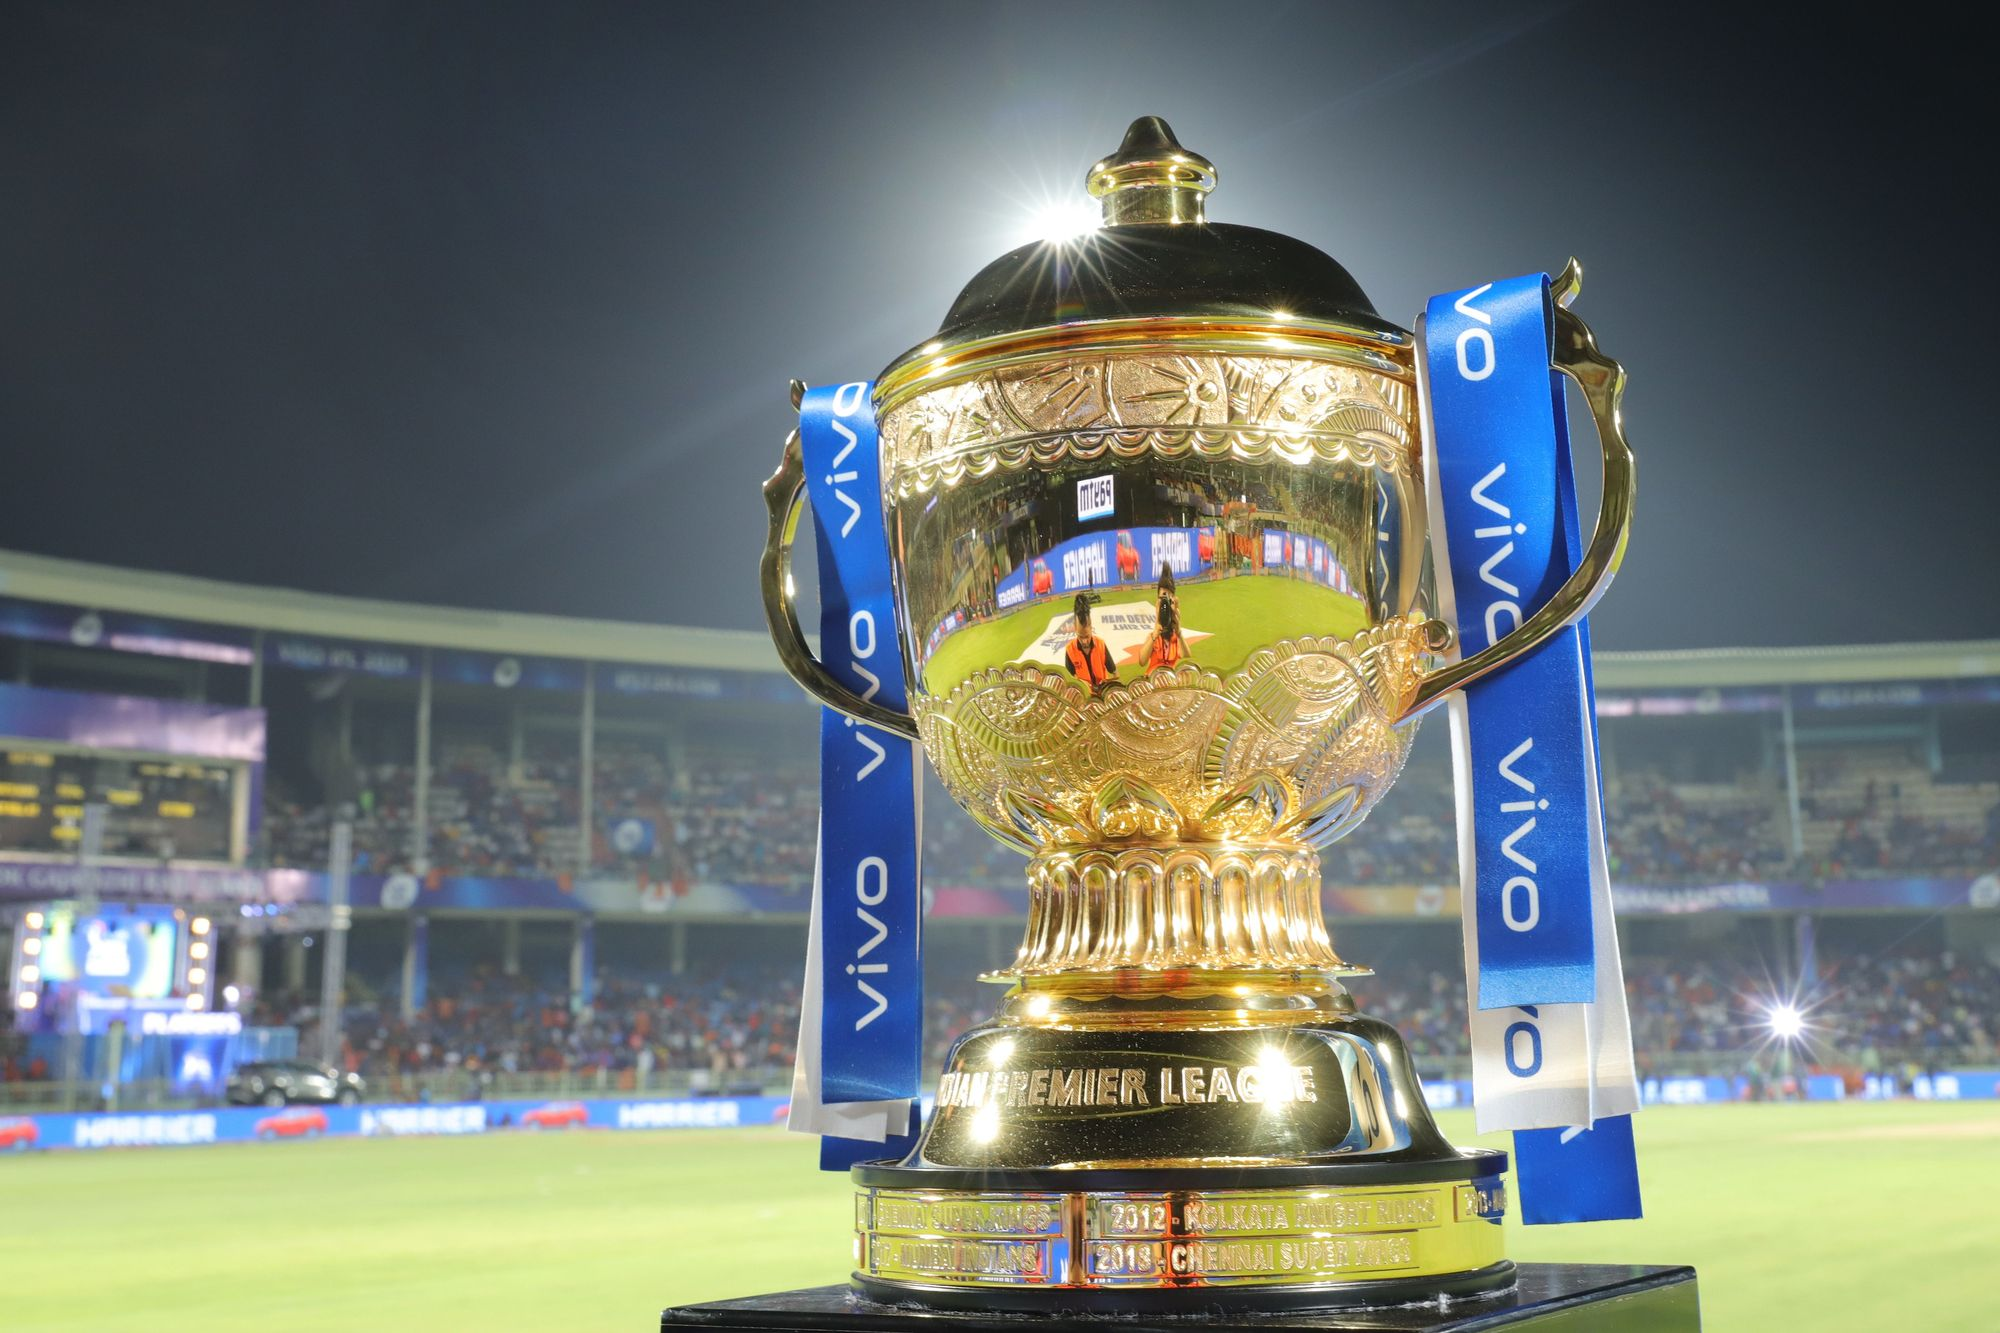

## Importing Libraries

In [ ]:
!pip install chart_studio

In [ ]:
import numpy as np
import pandas as pd
import chart_studio.plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.graph_objs as go

## Loading Dataset

In [ ]:
deliveries = pd.read_csv('../input/tsf-datasets/deliveries.csv')
matches = pd.read_csv('../input/tsf-datasets/matches.csv')

In [ ]:
matches.head()

In [ ]:
matches.info()

In [ ]:
#since umpire3 contains many null values, we can omit the column
matches.drop('umpire3', axis = 1, inplace = True)

In [ ]:
x = ['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions', 
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

y = ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

matches.replace(x, y, inplace = True)
deliveries.replace(x, y, inplace = True)

* In December 2018, the team changed its name from the Delhi Daredevils to the Delhi Capitals.
* Sunrisers Hyderabad replaced the Deccan Chargers in 2012 and debuted in 2013.

(But we will consider them same for the sake of simplicity and non-redundancy)

## Matches in every Season

In [ ]:
matches['season'].value_counts().head()

In [ ]:
data = [go.Histogram(x = matches['season'], marker = dict(color = '#EB89B5'), opacity = 0.75)]
layout = go.Layout(title = 'Matches In Every Season', xaxis = dict(title = 'Season', tickmode = 'linear'), yaxis = dict(title = 'Count'), bargap = 0.2)
fig = go.Figure(data = data, layout = layout)
#fig.update_xaxes(tickangle = 45)
iplot(fig)

The year 2013 has most number of matches.
May be due to super over (super over occurs when there is a tie in the score)

Moreover there are 10 teams in 2011, 9 in 2012 and 2013

## Matches Played vs Wins by Each Team

In [ ]:
matches_played = pd.concat([matches['team1'], matches['team2']])
matches_played = matches_played.value_counts().reset_index()
matches_played.columns = ['Team', 'Total Matches']
matches_played['wins'] = matches['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team', inplace = True)

In [ ]:
matches_played.reset_index().head(8)

In [ ]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'], 3)*100
win_percentage.head(3)

In [ ]:
#Plotting
trace1 = go.Bar(x = matches_played.index, y = matches_played['Total Matches'], name = 'Total Matches', opacity = 0.4)
trace2 = go.Bar(x = matches_played.index, y = matches_played['wins'], name = 'Matches Won', marker = dict(color = 'red'), opacity = 0.4)
trace3 = go.Bar(x = matches_played.index, y = win_percentage, name = 'Win Percentage', marker = dict(color = 'gold'), opacity = 0.6)

data =[trace1, trace2, trace3]

layout = go.Layout(title = 'Match Played, Wins and Win Percentage(%)', xaxis = dict(title = 'Team'), yaxis = dict(title = 'Count'), bargap = 0.2, bargroupgap = 0.1, hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

Mumbai indians have most number of wins with most number of matches.

## Venue of Most Matches

In [ ]:
venue_matches = matches.groupby('venue').count()[['id']].sort_values(by = 'id', ascending = False).head()
ser = pd.Series(venue_matches['id'])
ser

In [ ]:
venue_matches = matches.groupby('venue').count()[['id']].reset_index()

data = [{"x" : venue_matches['id'], "y" : venue_matches['venue'], "marker" : {"color" : "lightblue", "size" : 12},
         "line" : {"color" : "red", "width" : 2, "dash" : 'dash'}, "mode" : "markers+lines", "name" : "Women", "type" : "scatter"}]

layout = {"title" : "Stadiums and Matches",
          "xaxis" : {"title" : "Matches Played"},
          "yaxis" : {"title" : "Stadiums"}, 
          "autosize" : False, "width" : 900, "height"  : 1000,
          "margin"  : go.layout.Margin(l = 340, r = 0, b = 100, t = 100, pad = 0)}
fig = go.Figure(data = data, layout = layout)
iplot(fig)

* So Eden Gardens, M Chinnaswamy, Wankhede and Feroz Shah Kotla are statiums with most matches.
* Reason being, usually eliminators, qualifiers and final of each season are held here.

## Most Umpiring Done:

In [ ]:
ump = pd.concat([matches['umpire1'], matches['umpire2']])
ump = ump.value_counts()
ump_frame = ump.to_frame().reset_index()

In [ ]:
ump.head()

In [ ]:
data = [go.Bar(x = ump_frame['index'], y = ump_frame[0], opacity = 0.4)]

layout = go.Layout(title = 'Umpires in Matches', yaxis = dict(title = 'Matches'), bargap = 0.2, hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

S Ravi(106) and HDPK Dhrmasena(87) are most popular umpires in IPL.

## 1. Runs per Season

### 1.1 Average and Total Runs

In [ ]:
batsmen = matches[['id','season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()

avgruns_each_season=matches.groupby(['season']).count().id.reset_index()
avgruns_each_season.rename(columns = {'id' : 'matches'}, inplace = 1)
avgruns_each_season['total_runs'] = season['total_runs']
avgruns_each_season['average_runs_per_match'] = avgruns_each_season['total_runs'] / avgruns_each_season['matches']

In [ ]:
fig = {"data" : [{"x" : season["season"], "y" : season["total_runs"],
                  "name" : "Total Run", "marker" : {"color" : "lightblue", "size": 12},
                  "line": {"width" : 3},"type" : "scatter", "mode" : "lines+markers" },
        
                 {"x" : season["season"], "y" : avgruns_each_season["average_runs_per_match"],
                  "name" : "Average Run", "marker" : {"color" : "brown", "size": 12},
                  "type" : "scatter","line": {"width" : 3}, "mode" : "lines+markers",
                  "xaxis" : "x2", "yaxis" : "y2",}],
       
        "layout" : {"title": "Total and Average run per Season",
                    "xaxis2" : {"domain" : [0, 1],"anchor" : "y2",
                    "showticklabels" : False},"margin" : {"b" : 111},
                    "yaxis2" : {"domain" : [.55, 1], "anchor" : "x2", "title": "Average Run"},                    
                    "xaxis" : {"domain" : [0, 1],"tickmode":'linear', "title": "Year"},
                    "yaxis" : {"domain" :[0, .45], "title": "Total Run"}, 'hovermode' : 'x'}}

iplot(fig)

In [ ]:
avgruns_each_season.sort_values(by = 'total_runs', ascending = False).head(2)

* We see crest at 2012,2013 years (this is beacuse increase in no. of matches)
* Average runs per match increase over years

### 1.2 Run Distribution Over Years

In [ ]:
Season_boundaries = batsmen.groupby("season")["batsman_runs"].agg(lambda x : (x == 6).sum()).reset_index()
fours = batsmen.groupby("season")["batsman_runs"].agg(lambda x : (x == 4).sum()).reset_index()
Season_boundaries = Season_boundaries.merge(fours, left_on = 'season', right_on = 'season', how = 'left')
Season_boundaries = Season_boundaries.rename(columns = {'batsman_runs_x' :  '6"s', 'batsman_runs_y' : '4"s'})

In [ ]:
Season_boundaries['6"s'] = Season_boundaries['6"s']*6
Season_boundaries['4"s'] = Season_boundaries['4"s']*4
Season_boundaries['total_runs'] = season['total_runs']

In [ ]:
trace1 = go.Bar(
    x = Season_boundaries['season'],
    y = Season_boundaries['total_runs'] - (Season_boundaries['6"s'] + Season_boundaries['4"s']),
    name = 'Remaining runs', opacity = 0.6)

trace2 = go.Bar(
    x = Season_boundaries['season'],
    y = Season_boundaries['4"s'],
    name = 'Run by 4"s', opacity = 0.7)

trace3 = go.Bar(
    x = Season_boundaries['season'],
    y = Season_boundaries['6"s'],
    name = 'Run by 6"s', opacity = 0.7)


data = [trace1, trace2, trace3]
layout = go.Layout(title = "Run Distribution per year", barmode = 'stack', xaxis = dict(tickmode = 'linear', title = "Year"),
                                    yaxis = dict(title = "Run Distribution"), hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

Just slight increase in runs by boundaries over years

## 2. Target of 200 Runs or More

In [ ]:
high_scores = deliveries.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index() 
high_scores = high_scores[high_scores['total_runs'] >= 200]
high_scores.nlargest(10, 'total_runs')

In [ ]:
high_scores = high_scores[high_scores.batting_team != 'GL']
high_scores = high_scores[high_scores.bowling_team != 'RPS']
high_scores = high_scores[high_scores.bowling_team != 'GL']
high_scores = high_scores[high_scores.bowling_team != 'PW']

### 2.1 How many times each Team scored > 200

In [ ]:
high_scores = high_scores.groupby(['inning', 'batting_team']).count().reset_index()
high_scores.drop(["bowling_team", "total_runs"],axis = 1, inplace = True)
high_scores.rename(columns = {"match_id" : "total_times"}, inplace = True)

high_scores_1 = high_scores[high_scores['inning'] == 1]
high_scores_2 = high_scores[high_scores['inning'] == 2]

In [ ]:
high_scores_1.sort_values(by = 'total_times', ascending = False).head(2)

In [ ]:
trace1 = go.Bar(x = high_scores_1['batting_team'], y = high_scores_1['total_times'], name = 'Ist Innings')
trace2 = go.Bar(x = high_scores_2['batting_team'], y = high_scores_2['total_times'], name = 'IInd Innings')

fig = tools.make_subplots(rows = 1, cols = 2, subplot_titles = ('At Ist Innings', 'At IInd Innings'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

iplot(fig)

### 2.2 Is it possible to chase >200 Target

In [ ]:
high_scores = deliveries.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()
high_scores1 = high_scores[high_scores['inning'] == 1]
high_scores2 = high_scores[high_scores['inning'] == 2]
high_scores1 = high_scores1.merge(high_scores2[['match_id', 'inning', 'total_runs']], on = 'match_id')
high_scores1.rename(columns = {'inning_x' : 'inning_1', 'inning_y' : 'inning_2', 'total_runs_x' : 'inning1_runs', 'total_runs_y' : 'inning2_runs'}, inplace = True)
high_scores1 = high_scores1[high_scores1['inning1_runs'] >= 200]
high_scores1['is_score_chased'] = 1
high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs'] <= high_scores1['inning2_runs'], 'yes', 'no')

In [ ]:
slices = high_scores1['is_score_chased'].value_counts().reset_index().is_score_chased
list(slices)
labels = ['No', 'Yes']
slices

In [ ]:
trace0 = go.Pie(labels = labels, values  = slices,
              hoverinfo =  'label+value')

layout = go.Layout(title = '200 score chased ?')
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig)

It seems that it is hard to achieve this target, only 17 out of 100 targets greater than 200 have  been chased successfully.

## 3. Average Score of Each Team Per Season

In [ ]:
agg = matches[['id', 'season', 'winner', 'toss_winner', 'toss_decision', 'team1']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsman_grp = agg.groupby(["season", "match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
runs_scored = batsmen.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].agg(['sum', 'mean']).reset_index()
runs_scored['mean'] = round(runs_scored['mean'])

In [ ]:
agg_battingteam = agg.groupby(['season', 'match_id', 'inning', 'batting_team', 'bowling_team', 'winner'])['total_runs'].sum().reset_index()
winner = agg_battingteam[agg_battingteam['batting_team'] == agg_battingteam['winner']]
winner_batting_first = winner[winner['inning'] == 1]
winner_batting_second = winner[winner['inning'] == 2]

winner_runs_batting_first = winner_batting_first.groupby(['season', 'winner'])['total_runs'].mean().reset_index().round()
winner_runs_batting_second = winner_batting_second.groupby(['season', 'winner'])['total_runs'].mean().reset_index().round()

winner_runs = winner_runs_batting_first.merge(winner_runs_batting_second, on = ['season', 'winner'])
winner_runs.columns = ['season', 'winner', 'batting_first', 'batting_second']

In [ ]:
total_win = matches.groupby(['season', 'winner']).count()[['id']].reset_index()
winner_runs["wins"] = total_win['id']

In [ ]:
winner_runs.sort_values(by = ['season'], inplace = True)

In [ ]:
csk = winner_runs[winner_runs['winner'] == 'CSK']
rr = winner_runs[winner_runs['winner'] == 'RR']
srh = winner_runs[winner_runs['winner'] == 'SRH']
kkr = winner_runs[winner_runs['winner'] == 'KKR']
mi = winner_runs[winner_runs['winner'] == 'MI']
rcb = winner_runs[winner_runs['winner'] == 'RCB']
kxip = winner_runs[winner_runs['winner'] == 'KXIP']
dd = winner_runs[winner_runs['winner'] == 'DC']

In [ ]:
trace1 = go.Scatter(x = csk['season'], y = csk['batting_first'], name = 'Batting First')
trace2 = go.Scatter(x = csk['season'], y = csk['batting_second'], name = 'Batting Second')
trace3 = go.Scatter(x = rr['season'], y = rr['batting_first'], name = 'Batting First')
trace4 = go.Scatter(x = rr['season'], y = rr['batting_second'], name = 'Batting Second')
trace5 = go.Scatter(x = srh['season'], y = srh['batting_first'], name = 'Batting First')
trace6 = go.Scatter(x = srh['season'], y = srh['batting_second'], name = 'Batting Second')
trace7 = go.Scatter(x = kkr['season'], y = kkr['batting_first'], name = 'Batting First')
trace8 = go.Scatter(x = kkr['season'], y = kkr['batting_second'], name = 'Batting Second')
trace9 = go.Scatter(x = rcb['season'], y = rcb['batting_first'], name = 'Batting First')
trace10 = go.Scatter(x = rcb['season'], y = rcb['batting_second'], name = 'Batting Second')
trace11 = go.Scatter(x = kxip['season'], y = kxip['batting_first'], name = 'Batting First')
trace12 = go.Scatter(x = kxip['season'], y = kxip['batting_second'], name = 'Batting Second')
trace13 = go.Scatter(x = mi['season'], y = mi['batting_first'], name = 'Batting First')
trace14 = go.Scatter(x = mi['season'], y = mi['batting_second'], name = 'Batting Second')
trace15 = go.Scatter(x = dd['season'], y = dd['batting_first'], name = 'Batting First')
trace16 = go.Scatter(x = dd['season'], y = dd['batting_second'], name = 'Batting Second')

fig = tools.make_subplots(rows = 4, cols = 2, subplot_titles = ('CSK', 'RR','SRH', 'KKR','RCB', 'KXIP','MI', 'DC'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 1)
fig.append_trace(trace3, 1, 2)
fig.append_trace(trace4, 1, 2)
fig.append_trace(trace5, 2, 1)
fig.append_trace(trace6, 2, 1)
fig.append_trace(trace7, 2, 2)
fig.append_trace(trace8, 2, 2)
fig.append_trace(trace9, 3, 1)
fig.append_trace(trace10, 3, 1)
fig.append_trace(trace11, 3, 2)
fig.append_trace(trace12, 3, 2)
fig.append_trace(trace13, 4, 1)
fig.append_trace(trace14, 4, 1)
fig.append_trace(trace15, 4, 2)
fig.append_trace(trace16, 4, 2)

fig['layout'].update(title = 'Batting first vs Batting Second of Teams', showlegend = False, hovermode = 'x')
iplot(fig)

* Every team able to create a better than in first innings than second.
* Exception - KXIP ( Showing anamolous behavior :P)

### 4. Runs Per over of Each Team

In [ ]:
runs_per_over = deliveries.pivot_table(index = ['over'], columns = 'batting_team', values = 'total_runs', aggfunc = sum)
runs_per_over.reset_index(inplace = True)
runs_per_over.drop(['KTK', 'PW', 'RPS', 'GL'], axis = 1, inplace = True)

In [ ]:
trace1 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['CSK'], name = 'CSK',marker= dict(color= "blue",size=12))
trace2 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['DC'], name = 'DC')
trace3 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['KKR'], name = 'KKR')
trace4 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['KXIP'], name = 'KXIP')
trace5 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['MI'], name = 'MI')
trace6 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['RCB'], name = 'RCB')
trace7 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['RR'], name = 'RR')
trace8 = go.Scatter(x = runs_per_over['over'], y = runs_per_over['SRH'], name = 'SRH')

data = [trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8]

layout = go.Layout(title = 'Average Run in Each Over', xaxis = dict(tickmode = 'linear', title = "Over"),
                                    yaxis = dict(title = "Runs"), hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

* Powerplay is upto six overs so there is dip in 7th over
* MI is best at Death over (Good Finishers/Tailenders)
* RR is worst among all in death, middle and powerplay overs

## 5. PowerPlay Analysis

Powerplay is of starting 6 overs in T20 matches

During the first six overs, a maximum of 2 fielders can be outside the 30-yard circle.

In [ ]:
season = matches[['id', 'season', 'winner']]
complete_data = deliveries.merge(season, how = 'inner', left_on = 'match_id', right_on = 'id')

In [ ]:
powerplay_data = complete_data[complete_data['over'] <= 6]

inn1 = powerplay_data[powerplay_data['inning'] == 1].groupby('match_id')['total_runs'].agg(['sum']).reset_index()
inn2 = powerplay_data[powerplay_data['inning'] == 2].groupby('match_id')['total_runs'].agg(['sum']).reset_index()

In [ ]:
inn1.reset_index(inplace = True)
inn1.drop(["match_id"], axis = 1, inplace = True)

inn2.reset_index(inplace = True)
inn2.drop(["match_id"], axis = 1, inplace = True)

In [ ]:
fig = {"data" : [{"x" : inn1["index"], "y" : inn1["sum"], "marker" : {"color" : "blue", "size" : 2},
                  "line" : {"width" : 1.5}, "type" : "scatter", "mode" : "lines" },
        
                 {"x" : inn2["index"], "y" : inn2["sum"], "marker" : {"color" : "brown", "size": 2},
                  "type" : "scatter", "line": {"width" : 1.5}, "mode" : "lines",
                  "xaxis" : "x2", "yaxis" : "y2",}],
       
        "layout" : {"title" : "Inning 1 vs Inning 2 in Powerplay Overs",
                    "xaxis2" : {"domain" : [0, 1], "anchor" : "y2",
                    "showticklabels" : False},
                    "yaxis2" : {"domain" : [.55, 1], "anchor" : "x2", "title": "Inn2 Powerplay"},
                    "margin" : {"b" : 111},
                    "xaxis" : {"domain" : [0, 1],"title": "Matches"},
                    "yaxis" : {"domain" :[0, .45], "title": "Inn1 Poweplay"}, 'hovermode' : 'x'}}

iplot(fig)

### 5.2 Powerplay Average Runs

In [ ]:
pi1 = powerplay_data[powerplay_data['inning'] == 1].groupby(['season', 'match_id'])['total_runs'].agg(['sum'])
pi1 = pi1.reset_index().groupby('season')['sum'].mean()
pi1 = pi1.to_frame().reset_index()

pi2 = powerplay_data[powerplay_data['inning'] == 2].groupby(['season', 'match_id'])['total_runs'].agg(['sum'])
pi2 = pi2.reset_index().groupby('season')['sum'].mean()
pi2 = pi2.to_frame().reset_index()

In [ ]:
trace1 = go.Bar(x = pi1.season, y = pi1["sum"],
                name = 'Inning 1', opacity = 0.4)

trace2 = go.Bar(x = pi2.season, y = pi2["sum"], name = 'Inning 2',
                marker = dict(color = 'red'), opacity = 0.4)

data = [trace1, trace2]
layout = go.Layout(title = 'Powerplay Average runs per Year',
                   xaxis = dict(title = 'Year', tickmode = 'linear'),
                   yaxis = dict(title = 'Run'), bargap = 0.2, bargroupgap = 0.1, hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

So there is increase in runs in powerplay in last few years

### 5.3 Powerplay Average Dismissals

In [ ]:
powerplay_dismissals = powerplay_data.dropna(subset = ['dismissal_kind']).groupby(['season', 'match_id', 'inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].max()
powerplay_dismissals = powerplay_dismissals.reset_index()

powerplay_dismissals_first = powerplay_data[powerplay_data['inning'] == 1].dropna(subset = ['dismissal_kind']).groupby(['season', 'match_id', 'inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].mean()
powerplay_dismissals_first = powerplay_dismissals_first.reset_index()

powerplay_dismissals_second = powerplay_data[powerplay_data['inning'] == 2].dropna(subset = ['dismissal_kind']).groupby(['season', 'match_id', 'inning'])['dismissal_kind'].agg(['count']).reset_index().groupby('season')['count'].mean()
powerplay_dismissals_second = powerplay_dismissals_second.reset_index()

In [ ]:
trace1 = go.Bar(x = powerplay_dismissals.season, y = powerplay_dismissals["count"],
                name = 'Max', opacity = 0.4)

trace2 = go.Bar(x = powerplay_dismissals_first.season, y = powerplay_dismissals_first["count"], name = 'Inning 1',
                marker = dict(color = 'red'), opacity = 0.4)

trace3 = go.Bar(x = powerplay_dismissals_second.season, y = powerplay_dismissals_second["count"], name = 'Inning 2',
                marker = dict(color = 'lime'), opacity = 0.4)

data = [trace1, trace2, trace3]
layout = go.Layout(title = 'Powerplay Average Dismissals per Year',
                   xaxis = dict(title = 'Year', tickmode = 'linear'),
                   yaxis = dict(title = 'Wicket'), bargap = 0.2, bargroupgap = 0.1, hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

* Maximum fall of wickets in powerplay overs set new record in 2019(It was Deepak Chahar, Source:Internet)
* Dismissals in 2nd innings decrease significantly in 2019

## Batsman Analysis

In [ ]:
df_strike_rate = deliveries.groupby(['batsman']).agg({'ball' : 'count', 'batsman_runs' : 'mean'}).sort_values(by = 'batsman_runs', ascending = False)
df_strike_rate.rename(columns = {'batsman_runs' : 'strike rate'}, inplace = True)
df_runs_per_match = deliveries.groupby(['batsman', 'match_id']).agg({'batsman_runs' : 'sum'})
df_total_runs = df_runs_per_match.groupby(['batsman']).agg({'sum', 'mean', 'count'})
df_total_runs.rename(columns = {'sum' : 'batsman run', 'count' : 'match count', 'mean' : 'average score'}, inplace = True)
df_total_runs.columns = df_total_runs.columns.droplevel()
df_sixes = deliveries[['batsman', 'batsman_runs']][deliveries.batsman_runs == 6].groupby(['batsman']).agg({'batsman_runs' : 'count'})
df_four = deliveries[['batsman', 'batsman_runs']][deliveries.batsman_runs == 4].groupby(['batsman']).agg({'batsman_runs' : 'count'})
df_batsman_stat = pd.merge(pd.merge(pd.merge(df_strike_rate, df_total_runs, left_index = True, right_index = True),
                                    df_sixes, left_index = True, right_index = True), df_four, left_index = True, right_index = True)

In [ ]:
df_batsman_stat.rename(columns = {'ball' : 'ball', 'strike rate' : 'strike_rate', 'batsman run' : 'batsman_run',
                                  'match count' : 'match_count', 'average score' : 'average_score' , 'batsman_runs_x' : 'six',
                                  'batsman_runs_y' : 'four'}, inplace = True)
df_batsman_stat['strike_rate'] = df_batsman_stat['strike_rate'] * 100
df_batsman_stat.sort_values(by = 'batsman_run', ascending = False, inplace = True)
df_batsman_stat.reset_index(inplace = True)

### 6.1 Highest Average and Strike rate for >50 Matches

In [ ]:
average_score = df_batsman_stat.sort_values(by = 'average_score', ascending = False)
average_score = average_score[average_score['match_count'] > 50].head(10)

strike_rate = df_batsman_stat.sort_values(by = 'strike_rate', ascending = False)
strike_rate = strike_rate[strike_rate['match_count'] > 50].head(10)

In [ ]:
trace1 = go.Bar(x = average_score['batsman'], y = average_score['average_score'],
                name = 'Average Score', marker = dict(color = 'gold'), opacity = 0.6, showlegend = False)

trace2 = go.Bar(x = strike_rate['batsman'], y = strike_rate['strike_rate'],
                name = 'Strike Rate', marker = dict(color = 'brown'), opacity = 0.6, showlegend = False)

fig = tools.make_subplots(rows = 1, cols = 2, subplot_titles = ('Highest Average Score', 'Highest Strike Rate'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

fig['layout']['xaxis1'].update(title = 'Player')
fig['layout']['xaxis2'].update(title = 'Player')
fig.update_layout(hovermode = 'x')
iplot(fig)

No doubt Warner, Gayle and Pant are best in terms of both strike rate and average runs

### 6.2 Top 20 Batsman

In [ ]:
top_df_batsman = df_batsman_stat.head(20)
top_df_batsman.head(5)

In [ ]:
data = [{"y" : top_df_batsman.match_count,
        "x" : top_df_batsman.batsman,
        "mode" : "markers",
        "marker" : {"color" : top_df_batsman.six, "size" : top_df_batsman.average_score, 'showscale' : True},
        "text" : top_df_batsman.batsman}]
iplot(data)

* Virat Kohli has highest total runs across all seasons. Suresh Raina is just few runs behind with the second spot.
* Average Score and 6"s by Parthiv Patel is lowest among top 20 batsmen.
* Gayle is at top in 6"s

### 6.3 Top 10 Batsman in each run category

In [ ]:
toppers = deliveries.groupby(['batsman', 'batsman_runs'])['total_runs'].count().reset_index()
toppers = toppers.pivot('batsman', 'batsman_runs', 'total_runs')
toppers.reset_index(inplace = True)

In [ ]:
top_6 = toppers.sort_values(6, ascending = False).head(10)
top_4 = toppers.sort_values(4, ascending = False).head(10)
top_2 = toppers.sort_values(2, ascending = False).head(10)
top_1 = toppers.sort_values(1, ascending = False).head(10)

In [ ]:
trace1 = go.Scatter(x = top_6.batsman, y = top_6[6], name = '6"s', marker = dict(color = "blue", size = 9), line = dict(width = 2, dash = 'dash'))
trace2 = go.Scatter(x = top_4.batsman, y = top_4[4], name = '4"s', marker = dict(color = "orange", size = 9), line = dict(width = 2, dash ='longdash'))
trace3 = go.Scatter(x = top_2.batsman, y = top_2[2], name = '2"s', marker = dict(color = "green", size = 9), line = dict(width = 2, dash = 'dashdot'))
trace4 = go.Scatter(x = top_1.batsman, y = top_1[1], name = '1"s', marker = dict(color = "red", size = 9), line = dict(width = 2, dash = 'longdashdot'))

fig = tools.make_subplots(rows = 4, cols = 1, subplot_titles = ('Top 6"s Scorer', 'Top 4"s Scorer', 'Top 2"s Scorer', 'Top 1"s Scorer'))

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)

fig['layout'].update(title = 'Top Scorer in each Category', showlegend = False, hovermode = 'x')
iplot(fig)

* Difference between 6"s by Gayle(1st) and AB de Villiers(2nd) is of 113
* Suresh Raina has a prominent place in all the lists plotted above.

### 6.4 Orange Cap Holders

In [ ]:
orange = matches[['id', 'season']]
orange = orange.merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left')
orange = orange.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()
orange = orange.sort_values('batsman_runs', ascending = 0)
orange = orange.drop_duplicates(subset = ["season"], keep = "first")

In [ ]:
data = [go.Bar(x = orange['season'].values, y = orange['batsman_runs'].values,
                name = 'Total Matches', text =  orange['batsman'].values,
                marker = dict(color = 'rgb(255, 140, 0)',
                            line = dict(color = 'rgb(8, 48, 107)', width = 1.5,)), opacity = 0.7)]

layout = go.Layout(title = 'Orange-Cap Holders', xaxis = dict(tickmode = 'linear', title = "Year"),
                   yaxis = dict(title = 'Runs'), hovermode = 'x')
fig = go.Figure(data = data, layout = layout)
iplot(fig)

* Virat kohli owned Orange Cap with a whopping 973 runs in 2016, highest ever.

## 7. Bowler Analysis

### 7.1 Best Bowler in Each category

In [ ]:
bowlers = deliveries.groupby('bowler').sum().reset_index()
bowl = deliveries['bowler'].value_counts().reset_index()
bowlers = bowlers.merge(bowl, left_on = 'bowler', right_on = 'index', how = 'left')
bowlers = bowlers[['bowler_x', 'total_runs', 'bowler_y']]
bowlers.rename({'bowler_x' : 'bowler', 'total_runs' : 'runs_given', 'bowler_y' : 'balls'}, axis = 1, inplace = True)
bowlers['overs'] = (bowlers['balls'] // 6)

In [ ]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  
ct = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
ct = ct['bowler'].value_counts().reset_index()
bowlers = bowlers.merge(ct, left_on = 'bowler', right_on = 'index', how = 'left').dropna()
bowlers = bowlers[['bowler_x', 'runs_given', 'overs', 'bowler_y']]
bowlers.rename({'bowler_x' : 'bowler', 'bowler_y' : 'wickets'}, axis = 1, inplace = True)
bowlers['economy'] = (bowlers['runs_given'] / bowlers['overs'])

In [ ]:
bowlers_top = bowlers.sort_values(by = 'runs_given', ascending = False)
bowlers_top = bowlers_top.head(20)

In [ ]:
trace = go.Scatter(y = bowlers_top['wickets'], x = bowlers_top['bowler'], mode = 'markers',
                   marker = dict(size = bowlers_top['wickets'].values,
                               color = bowlers_top['economy'].values,
                               colorscale = 'Viridis',
                               showscale = True,
                               colorbar = dict(title = 'Economy')),
                   text = bowlers['overs'].values)

data = [(trace)]

layout = go.Layout(autosize = True,
                  title = 'Top 20 Wicket Taking Bowlers',
                  hovermode = 'closest',
                  xaxis =dict(showgrid = False, zeroline = False,
                              showline = False),
                  yaxis = dict(title = 'Wickets Taken', ticklen = 5,
                             gridwidth = 2, showgrid = False,
                             zeroline = False, showline = False),
                  showlegend = False)

fig = go.Figure(data = data, layout = layout)
iplot(fig)

* Hightest wicket taker is Malinga.

### 7.2 Purple Cap Holders

In [ ]:
dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
purple = deliveries[deliveries["dismissal_kind"].isin(dismissal_kinds)]
purple = purple.merge(matches, left_on = 'match_id', right_on = 'id', how = 'outer')
purple = purple.groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()
purple = purple.sort_values('dismissal_kind',ascending = False)
purple = purple.drop_duplicates('season', keep = 'first').sort_values(by = 'season')
purple.rename({'dismissal_kind' : 'count_wickets'}, axis = 1, inplace = True)

In [ ]:
trace1 = go.Bar(x = purple['season'].values, y = purple['count_wickets'].values,
                name = 'Total Matches', text = purple['bowler'].values,
                marker = dict(color = 'rgb(75, 0, 130)',
                            line = dict(color = 'rgb(108, 148, 107)', width = 1.5,)),
                opacity = 0.7)

layout = go.Layout(title = 'Purple-Cap Holders', xaxis = dict(tickmode = 'linear', title = "Year"),
                   yaxis = dict(title = 'Wickets'), hovermode = 'x')

data = [trace1]
fig = go.Figure(data = data, layout = layout)
iplot(fig)

* DJ Bravo owned Purple cap with highest 32 wickets in 2013.

# 8. Winner Analysis

In [ ]:
season_winner = matches.drop_duplicates(subset = ['season'], keep = 'last')[['season', 'winner']].reset_index(drop = True)
season_winner = season_winner['winner'].value_counts()

season_winner = season_winner.to_frame()
season_winner.reset_index(inplace = True)
season_winner.rename(columns = {'index' : 'team'}, inplace = True)

### 8.1 Which team win highest no. of seasons

In [ ]:
season_winner

In [ ]:
trace0 = go.Pie(labels = season_winner['team'], values = season_winner['winner'],
              hoverinfo = 'label+value+name', name = "Winner")

layout = go.Layout(title = 'Winner of IPL season')
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig)

* MI won 4 seasons of IPL.
* DC, KXIP, RCB haven't won any title yet.

### 8.2 Match Played vs wins in Final Match of Every Season

In [ ]:
finals = matches.drop_duplicates(subset = ['season'], keep = 'last')
finals = finals[['id', 'season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]
most_finals = pd.concat([finals['team1'], finals['team2']]).value_counts().reset_index()
most_finals.rename({'index' : 'team', 0 : 'count'}, axis = 1, inplace = True)
xyz = finals['winner'].value_counts().reset_index()

In [ ]:
most_finals = most_finals.merge(xyz,left_on = 'team', right_on = 'index', how = 'outer')
most_finals = most_finals.replace(np.NaN, 0)
most_finals.drop('index', axis = 1, inplace = True)
most_finals.set_index('team', inplace = True)
most_finals.rename({'count' : 'finals_played', 'winner' : 'won_count'}, inplace = True, axis = 1)
most_finals.reset_index(inplace = True)

In [ ]:
trace1 = go.Bar(x = most_finals.team, y = most_finals.finals_played,
                name = 'Total Matches', opacity = 0.4)

trace2 = go.Bar(x = most_finals.team, y = most_finals.won_count,
                name = 'Matches Won', marker = dict(color = 'red'), opacity = 0.4)

data = [trace1, trace2]

layout = go.Layout(title = 'Match Played vs Wins In Finals', xaxis = dict(title = 'Team'),
                   yaxis = dict(title = 'Count'), bargap = 0.2, bargroupgap = 0.1, hovermode = 'x')

fig = go.Figure(data = data, layout = layout)
iplot(fig)

* CSK has played 8 out of 12 finals of IPL.
* MI win 4 out of 5 finals.
* RCB has appeared in 3 finals but never won till now.

### 8.3 Is Toss Outcome the Final Outcome in Finals ?

In [ ]:
df = finals[finals['toss_winner'] == finals['winner']]
slices = [len(df), (len(finals) - len(df))]
labels = ['yes', 'no']

In [ ]:
trace0 = go.Pie(labels = labels, values = slices,
              hoverinfo = 'label+value+name', name = "Winner")

layout = go.Layout(title = 'Winner of IPL season')
fig = go.Figure(data = [trace0], layout = layout)
iplot(fig)

* Woah! Each 3 among 4 toss winners is match winner in Finals. That's Incredible.